In [1]:
#importamos la libreria de opencv y matplotlib para poder visualizar la imagen correctamente
import cv2
import numpy as np
import matplotlib.pyplot as plt

Binarización de imágenes

In [9]:

#Binarizado normal con los rangos manuales
#leemos la imagen, se necesita poner la r delante de la dirección para que no se confunda en la ruta 
img = cv2.imread(r'C:\Users\joano\Desktop\vision artificial juan olivan\imagenes\monedas.jpg',0)# en escala de grises 
#umbralestablecido,imagenbinarizada=cv2.threshold(imagen,valor umbral,valor unmbral máximo,tipo de algortimo
_,th=cv2.threshold(img,150,255,cv2.THRESH_BINARY)

cv2.imshow("original",img)
cv2.imshow("bin",th)

cv2.waitKey()
cv2.destroyAllWindows()



In [8]:
#Binarizado invertido con los rangos manuales
#leemos la imagen, se necesita poner la r delante de la dirección para que no se confunda en la ruta 
img = cv2.imread(r'C:\Users\joano\Desktop\vision artificial juan olivan\imagenes\monedas.jpg',0)# en escala de grises 
#umbralestablecido,imagenbinarizada=cv2.threshold(imagen,valor umbral,valor unmbral máximo,tipo de algortimo
_,th=cv2.threshold(img,150,255,cv2.THRESH_BINARY_INV)

cv2.imshow("original",img)
cv2.imshow("bin",th)

cv2.waitKey()
cv2.destroyAllWindows()


In [11]:
#Vamos a crear una binarización de imagen junto a un tackbar, una barra que se deslizará por lo valores 0-255

#Función de binarización
def umbral(valor):
    _,th=cv2.threshold(img,valor,255,cv2.THRESH_BINARY)#función de binarización con un valor inicial escogido por pantalla
    cv2.imshow("Binarizando",th)#mostramos la imagen binarizada

cv2.namedWindow("Binarizando")#creamos el nombre de la ventana
img = cv2.imread(r'C:\Users\joano\Desktop\vision artificial juan olivan\imagenes\monedas.jpg',0)# en escala de grises 
#Creaomos una tackar para la selección del valor, "Umbral" es el nombre de la barra, "Binarización" es el nombre de la ventana creada,0-255 es el valor en los que podrá oscilar, y umbral es la función que se llama 
cv2.createTrackbar("Umbral","Binarizando",0,255,umbral)

cv2.waitKey()
cv2.destroyAllWindows()

In [12]:
#truncar umbral
#Vamos a crear una binarización de imagen junto a un tackbar, una barra que se deslizará por lo valores 0-255

#Función de binarización
def umbral(valor):
    _,th=cv2.threshold(img,valor,255,cv2.THRESH_TRUNC)#función de binarización con un valor inicial escogido por pantalla
    cv2.imshow("Binarizando",th)#mostramos la imagen binarizada

cv2.namedWindow("Binarizando")#creamos el nombre de la ventana
img = cv2.imread(r'C:\Users\joano\Desktop\vision artificial juan olivan\imagenes\monedas.jpg',0)# en escala de grises 
#Creaomos una tackar para la selección del valor, "Umbral" es el nombre de la barra, "Binarización" es el nombre de la ventana creada,0-255 es el valor en los que podrá oscilar, y umbral es la función que se llama 
cv2.createTrackbar("Umbral","Binarizando",0,255,umbral)

cv2.waitKey()
cv2.destroyAllWindows()

In [14]:
#Ajuste a cero
#Vamos a crear una binarización de imagen junto a un tackbar, una barra que se deslizará por lo valores 0-255

#Función de binarización
def umbral(valor):
    _,th=cv2.threshold(img,valor,255,cv2.THRESH_TOZERO)#función de binarización con un valor inicial escogido por pantalla
    cv2.imshow("Binarizando",th)#mostramos la imagen binarizada

cv2.namedWindow("Binarizando")#creamos el nombre de la ventana
img = cv2.imread(r'C:\Users\joano\Desktop\vision artificial juan olivan\imagenes\monedas.jpg',0)# en escala de grises 
#Creaomos una tackar para la selección del valor, "Umbral" es el nombre de la barra, "Binarización" es el nombre de la ventana creada,0-255 es el valor en los que podrá oscilar, y umbral es la función que se llama 
cv2.createTrackbar("Umbral","Binarizando",0,255,umbral)

cv2.waitKey()
cv2.destroyAllWindows()

In [16]:
#Ajuste a cero pero invertido
#Vamos a crear una binarización de imagen junto a un tackbar, una barra que se deslizará por lo valores 0-255

#Función de binarización
def umbral(valor):
    _,th=cv2.threshold(img,valor,255,cv2.THRESH_TOZERO_INV)#función de binarización con un valor inicial escogido por pantalla
    cv2.imshow("Binarizando",th)#mostramos la imagen binarizada

cv2.namedWindow("Binarizando")#creamos el nombre de la ventana
img = cv2.imread(r'C:\Users\joano\Desktop\vision artificial juan olivan\imagenes\monedas.jpg',0)# en escala de grises 
#Creaomos una tackar para la selección del valor, "Umbral" es el nombre de la barra, "Binarización" es el nombre de la ventana creada,0-255 es el valor en los que podrá oscilar, y umbral es la función que se llama 
cv2.createTrackbar("Umbral","Binarizando",0,255,umbral)

cv2.waitKey()
cv2.destroyAllWindows()

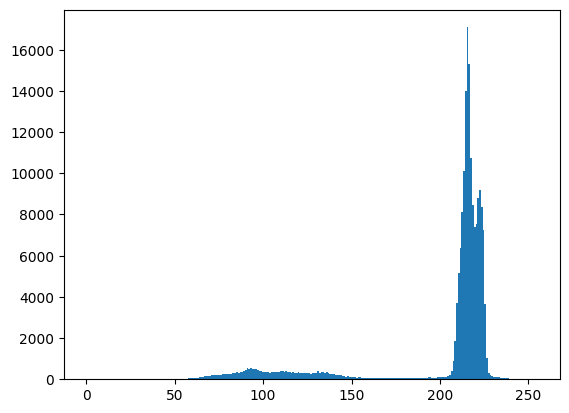

162.0


In [2]:
#Umbralización de OTSU
img = cv2.imread(r'C:\Users\joano\Desktop\vision artificial juan olivan\imagenes\monedas.jpg',0)# en escala de grises 
hist=cv2.calcHist([img],[0],None,[256],[0,255])#¿buscar definición del cálculo del histograma?
plt.hist(img.ravel(),256,[0,255])#¿buscar definición del aplanado de la imagen?
plt.show()

umbral,th=cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(umbral)

cv2.imshow("original",img)
cv2.imshow("bin",th)

cv2.waitKey()
cv2.destroyAllWindows()





In [7]:
#Umbralización adaptativa ejemplo de monedas 
kernel=3
constante=0

def updateKernel(krn):
    global kernel
    kernel=krn

    if kernel<3:
        kernel=3
    elif kernel %2==0:
        kernel+=1
    umbralizada=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,kernel,constante)
    #el primer cv2 dentro de la función es el tipo de algoritmo y el segundo el tipo de binarización

    cv2.imshow("Binarizada",umbralizada)

def updateConstante(cte):
    global constante
    kernel=cte
    umbralizada=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,kernel,constante)

    cv2.imshow("Binarizada",umbralizada)


cv2.namedWindow("Binarizada")
img = cv2.imread(r'C:\Users\joano\Desktop\vision artificial juan olivan\imagenes\monedas.jpg',0)# en escala de grises 

cv2.createTrackbar("kernel","Binarizada",kernel,255,updateKernel)
cv2.createTrackbar("constante","Binarizada",constante,255,updateConstante)


cv2.waitKey()
cv2.destroyAllWindows()


In [8]:
#Umbralización adaptativa ejemplo de sudoku 
kernel=3
constante=0

def updateKernel(krn):
    global kernel
    kernel=krn

    if kernel<3:
        kernel=3
    elif kernel %2==0:
        kernel+=1
    umbralizada=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,kernel,constante)

    cv2.imshow("Binarizada",umbralizada)

def updateConstante(cte):
    global constante
    kernel=cte
    umbralizada=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,kernel,constante)

    cv2.imshow("Binarizada",umbralizada)


cv2.namedWindow("Binarizada")
img = cv2.imread(r'C:\Users\joano\Desktop\vision artificial juan olivan\imagenes\sudoku.png',0)# en escala de grises 

cv2.createTrackbar("kernel","Binarizada",kernel,255,updateKernel)
cv2.createTrackbar("constante","Binarizada",constante,255,updateConstante)


cv2.waitKey()
cv2.destroyAllWindows()

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1675: error: (-215:Assertion failed) blockSize % 2 == 1 && blockSize > 1 in function 'cv::adaptiveThreshold'
